In [45]:
import os
import pandas as pd
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as smd
import pylab as pl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import model_selection
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
import scikitplot as skplt
import plotnine
from plotnine import ggplot, geom_point, aes, geom_boxplot, geom_bar


In [2]:
os.chdir('C:/Users/Home/Documents/Laboral2020/Konrad Lorenz/MachineLearning/Clase3')

In [3]:
os.listdir()

['2. Reg Log',
 'Auto.xlsx',
 'Default.csv',
 'insurance.csv',
 'Regresión lineal y validación cruzada en Python.ipynb',
 'Smarket.csv',
 'Social_Network_Ads.csv']

In [4]:
Default = pd.read_csv('Default.csv')
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


Se desea pronosticar si la persona va a caer en mora en términos del saldo de la tarjeta de crédito.

In [5]:
#Default['default2'] =
Default['default2'] = Default['default'].factorize()[0]
X = Default.balance.values.reshape(-1,1) 
y = Default.default2
Default.head()

,default,student,balance,income,default2
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


In [6]:
X=Default.balance.values.reshape(-1,1) 
y=Default.default2

# Create array of test data. Calculate the classification probability
# and predicted classification.
X_plot = np.arange(Default.balance.min(), Default.balance.max()).reshape(-1,1)

mod_logistic=LogisticRegression()
mod_logistic.fit(X,y)
# Predict will give either 0 or 1 as output, Predict_proba will give the only probability of 1.
prob = mod_logistic.predict_proba(X_plot)
pd.Series(prob[:,1]).describe()

count    2655.000000
mean        0.271560
std         0.361484
min         0.000024
25%         0.000909
50%         0.033756
75%         0.573039
max         0.980975
dtype: float64

In [7]:
[mod_logistic.intercept_,mod_logistic.coef_]

[array([-10.65132824]), array([[0.00549892]])]

In [8]:
y_pred = mod_logistic.predict(X)
pd.Series(y_pred).value_counts()

0    9858
1     142
dtype: int64

In [9]:
cfm =confusion_matrix(y, y_pred)
cfm

array([[9625,   42],
       [ 233,  100]], dtype=int64)

In [10]:
total=sum(sum(cfm))

accuracy=(cfm[0,0]+cfm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cfm[0,0]/(cfm[0,0]+cfm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cfm[1,1]/(cfm[1,0]+cfm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9725
Sensitivity :  0.9956553222302679
Specificity :  0.3003003003003003


In [13]:
print(classification_report(y, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.976     0.996     0.986      9667
           1      0.704     0.300     0.421       333

    accuracy                          0.973     10000
   macro avg      0.840     0.648     0.703     10000
weighted avg      0.967     0.973     0.967     10000



(0.0, 1.05)

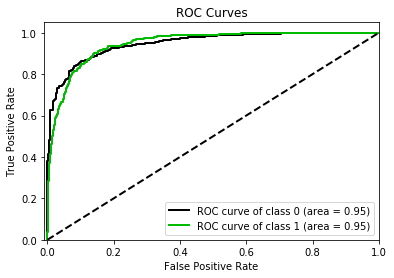

In [14]:
y_prob = mod_logistic.predict_proba(X)
ax = skplt.metrics.plot_roc(y, y_prob, plot_micro=False, plot_macro=False)
ax.set_xlim([-0.01, 1.0])
ax.set_ylim([0.0, 1.05])

En algunas ocasiones el modelo de regresión logístico tiene como proposito ayudar enteder cuales son las variables explican una variable de interés, por ejemplo comprender los factores más asociados a caer en mora.

In [15]:
X = sm.add_constant(Default.balance) #statsmodels
y = Default.default2
est = smd.Logit(y.ravel(), X).fit()
est.summary2().tables

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


[                     0                 1                  2            3
 0               Model:             Logit  Pseudo R-squared:        0.453
 1  Dependent Variable:                 y               AIC:    1600.4517
 2                Date:  2020-02-22 05:18               BIC:    1614.8724
 3    No. Observations:             10000    Log-Likelihood:      -798.23
 4            Df Model:                 1           LL-Null:      -1460.3
 5        Df Residuals:              9998       LLR p-value:  6.2329e-290
 6           Converged:            1.0000             Scale:       1.0000
 7      No. Iterations:           10.0000                                ,
              Coef.  Std.Err.          z          P>|z|     [0.025    0.975]
 const   -10.651331  0.361169 -29.491287  3.723665e-191 -11.359208 -9.943453
 balance   0.005499  0.000220  24.952404  2.010855e-137   0.005067  0.005931]

In [16]:
os.getcwd()

'C:\\Users\\Home\\Documents\\Laboral2020\\Konrad Lorenz\\MachineLearning\\Clase3'

In [18]:
os.listdir()

['2. Reg Log',
 'Auto.xlsx',
 'Default.csv',
 'insurance.csv',
 'Regresión lineal y validación cruzada en Python.ipynb',
 'Smarket.csv',
 'Social_Network_Ads.csv']

In [21]:
smarket = pd.read_csv('Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)
smarket.head()


,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


Se dispone del porcentaje de retorno para unas acciones en los 5 días previos (Lag1, ...Lag5), también se dispone del número de acciones en el día previo (en billones). Today es el porcentaje de retorno el día de hoy, Direction es si el mercado cayo o no.

In [23]:
smarket.replace({'Up': 1, 'Down': 0}, inplace=True)
smarket.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


In [24]:
smarket.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000
mean,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,0.518400
std,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,0.499861
min,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,0.000000
25%,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,0.000000
50%,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,1.000000
75%,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,1.000000
max,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000,1.000000


In [25]:
smarket.corr()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Lag1,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757
Lag2,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081
Lag3,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132
Lag4,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215
Lag5,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423
Volume,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951
Today,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563
Direction,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000


Las correlaciones entre las variables son bajas.

In [26]:
smarket.index

DatetimeIndex(['2001-01-01', '2001-01-01', '2001-01-01', '2001-01-01',
               '2001-01-01', '2001-01-01', '2001-01-01', '2001-01-01',
               '2001-01-01', '2001-01-01',
               ...
               '2005-01-01', '2005-01-01', '2005-01-01', '2005-01-01',
               '2005-01-01', '2005-01-01', '2005-01-01', '2005-01-01',
               '2005-01-01', '2005-01-01'],
              dtype='datetime64[ns]', name='Year', length=1250, freq=None)

In [27]:
smarket.columns.difference(['Today', 'Direction']) # Dejar las variables diferentes a Today y Direction

Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], dtype='object')

In [28]:
X = smarket[smarket.columns.difference(['Today', 'Direction'])]
y = smarket['Direction']
X_train = X[:'2004']
y_train = y[:'2004']
X_test = X['2005':]
y_test = y['2005':]

In [29]:
logistic_test = LogisticRegression(C=1e10)
logistic_test.fit(X_train, y_train)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred_test = logistic_test.predict(X_test)
cfm=confusion_matrix(y_test, y_pred_test)
cfm

array([[77, 34],
       [97, 44]], dtype=int64)

In [31]:
cfm / np.sum(cfm, axis = 1)

array([[0.69369369, 0.24113475],
       [0.87387387, 0.31205674]])

In [32]:
total=sum(sum(cfm))

accuracy=(cfm[0,0]+cfm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cfm[0,0]/(cfm[0,0]+cfm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cfm[1,1]/(cfm[1,0]+cfm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.4801587301587302
Sensitivity :  0.6936936936936937
Specificity :  0.3120567375886525


(0.0, 1.05)

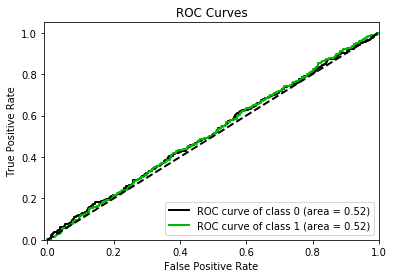

In [33]:
y_prob = logistic_test.predict_proba(X)
ax = skplt.metrics.plot_roc(y, y_prob, plot_micro=False, plot_macro=False)
ax.set_xlim([-0.01, 1.0])
ax.set_ylim([0.0, 1.05])

In [34]:
# Ejercicio haciendo uso de kfold

In [125]:
datos = pd.read_csv('Social_Network_Ads.csv', sep = "\t")
datos.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [126]:
datos.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

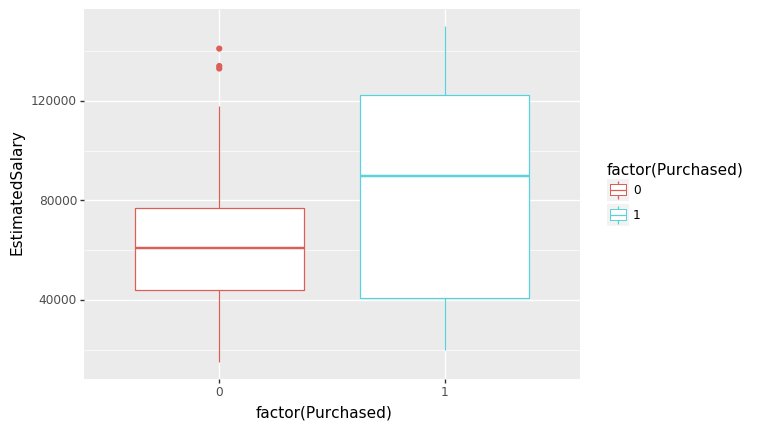

<ggplot: (148072979229)>

In [127]:
# https://github.com/yhat/ggpy/issues/662
(ggplot(datos, aes(x='factor(Purchased)',y='EstimatedSalary', color='factor(Purchased)')) + geom_boxplot())

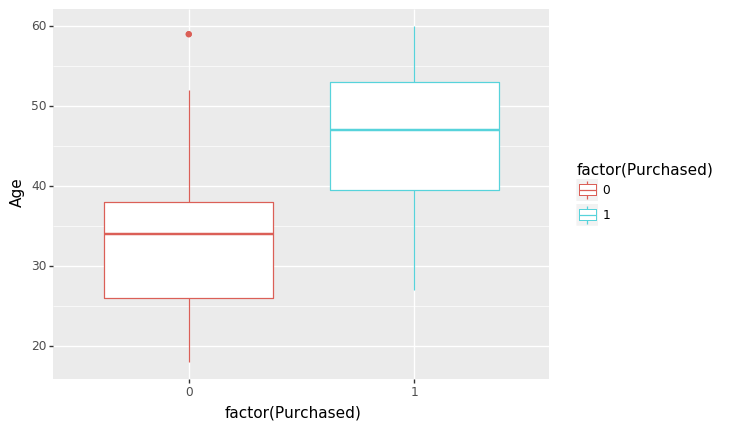

<ggplot: (148073004229)>

In [128]:
(ggplot(datos, aes(x='factor(Purchased)',y='Age', color='factor(Purchased)')) + geom_boxplot())

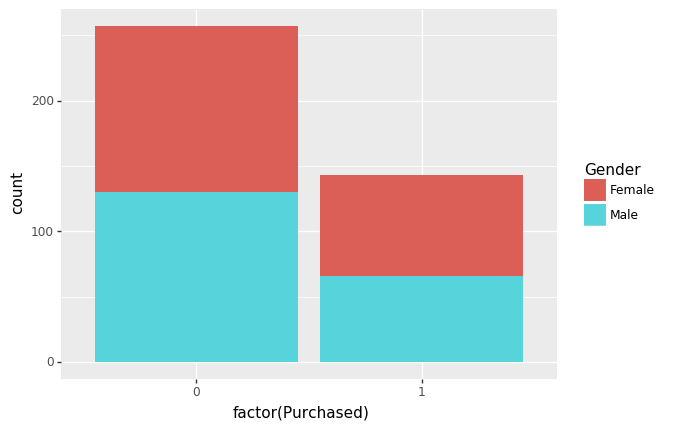

<ggplot: (148072397046)>

In [129]:
(ggplot(datos, aes(x='factor(Purchased)', fill='Gender')) + geom_bar())

La forma correcta de hacerlo: seleccionar muestra de entrenamiento del 80% y realizar sobre el mismo la validación cruzada.

In [130]:
datos.replace({'Female': 0, 'Male': 1}, inplace=True)
datos.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [148]:
X=datos.iloc[:,[1,2,3]]
Y=datos.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size = 0.2, random_state=12345) 
X_test

,Gender,Age,EstimatedSalary
378,1,41,87000
175,0,23,28000
396,1,51,23000
213,1,35,58000
110,0,39,71000
...,...,...,...
391,1,47,23000
246,0,35,50000
354,1,36,99000
358,1,40,71000


In [164]:
kf=model_selection.KFold(n_splits=10,random_state=22022020)
modelo_logis=LogisticRegression()
cross_val_score(modelo_logis, X_train, Y_train, cv=kf, scoring='accuracy')
#cross_val_score(modelo_polinomico, X_poly, Auto.mpg, cv=kf, scoring='neg_mean_squared_error').mean()

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([0.625  , 0.65625, 0.65625, 0.65625, 0.6875 , 0.65625, 0.71875,
       0.65625, 0.65625, 0.6875 ])

In [165]:
cross_val_score(modelo_logis, X_train, Y_train, cv=kf, scoring='accuracy').mean()


0.665625

In [166]:
score=cross_val_score(modelo_logisCV, X, Y, cv=kf, scoring='accuracy').mean()
score

0.6675000000000001

In [167]:
modelo=modelo_logis.fit(X_train, Y_train)
y_pred_test = modelo.predict(X_test)
print(classification_report(Y_test, y_pred_test ))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        44
           1       0.00      0.00      0.00        36

    accuracy                           0.55        80
   macro avg       0.28      0.50      0.35        80
weighted avg       0.30      0.55      0.39        80



C:\Users\Home\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [168]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [169]:
modelo.predict_proba(X_test)

array([[0.58123785, 0.41876215],
       [0.52635485, 0.47364515],
       [0.52165518, 0.47834482],
       [0.55442633, 0.44557367],
       [0.56649414, 0.43350586],
       [0.5692684 , 0.4307316 ],
       [0.53667661, 0.46332339],
       [0.5310499 , 0.4689501 ],
       [0.57480371, 0.42519629],
       [0.55907618, 0.44092382],
       [0.57019218, 0.42980782],
       [0.52541527, 0.47458473],
       [0.62097052, 0.37902948],
       [0.58490228, 0.41509772],
       [0.62362776, 0.37637224],
       [0.55349519, 0.44650481],
       [0.55163178, 0.44836822],
       [0.55814702, 0.44185298],
       [0.62451186, 0.37548814],
       [0.52729429, 0.47270571],
       [0.55163177, 0.44836823],
       [0.54042265, 0.45957735],
       [0.54883395, 0.45116605],
       [0.62362776, 0.37637224],
       [0.52729428, 0.47270572],
       [0.53011131, 0.46988869],
       [0.56556846, 0.43443154],
       [0.57756442, 0.42243558],
       [0.60487918, 0.39512082],
       [0.55069953, 0.44930047],
       [0.

In [170]:
cfm=confusion_matrix(Y_test, y_pred_test)
cfm

array([[44,  0],
       [36,  0]], dtype=int64)

In [171]:
total=sum(sum(cfm))

accuracy=(cfm[0,0]+cfm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cfm[0,0]/(cfm[0,0]+cfm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cfm[1,1]/(cfm[1,0]+cfm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.55
Sensitivity :  1.0
Specificity :  0.0


(0.0, 1.05)

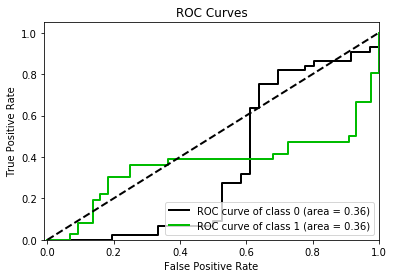

In [172]:
y_prob = modelo.predict_proba(X_test)
ax = skplt.metrics.plot_roc(Y_test, y_prob, plot_micro=False, plot_macro=False)
ax.set_xlim([-0.01, 1.0])
ax.set_ylim([0.0, 1.05])

In [173]:
y_pred2 = (modelo.predict_proba(X_test)[:,1] >= 0.47).astype(bool) # set threshold as 0.3
pd.Series(y_pred2).value_counts()

False    67
True     13
dtype: int64

In [174]:
cfm=confusion_matrix(Y_test, y_pred2)
cfm

array([[38,  6],
       [29,  7]], dtype=int64)